In [75]:
import pandas as pd
import csv
import os
import functools
from itertools import repeat
import datetime
from datetime import date
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import sklearn
from scipy.stats import linregress
import seaborn as sns
from matplotlib.ticker import MaxNLocator


In [2]:
video_path = os.path.join("data", "video_data_2.csv")
video_df = pd.read_csv(video_path)
video_df

,Unnamed: 0,id,channelTitle,publishedAt,channelId,title,categoryId,description,tags,duration,...,caption,licensedContent,projection,viewCount,likeCount,favoriteCount,commentCount,Tag Count,Description Length (characters),Description Length (words)
0,0,2ruoagytC7w,PushToProd,2023-09-14T21:00:02Z,UCN0u98NPeC0AW3pD6MbVeNg,day in the life | Jr. Cybersecurity Engineer N...,28,Here’s the part 2 to my day in the life/ vlog!...,"['devops', 'azure', 'aws', 'cloud', 'docker', ...",PT7M22S,...,False,True,rectangular,1032,61.0,0,22.0,39.0,162,20
1,1,gBH1LdSZyFU,PushToProd,2023-09-04T22:27:11Z,UCN0u98NPeC0AW3pD6MbVeNg,day in the life | Jr. Cybersecurity Engineer N...,28,Hey Guys! \n\nHope you enjoy Part 1 of this da...,"['devops', 'azure', 'aws', 'cloud', 'docker', ...",PT14M8S,...,False,True,rectangular,2006,86.0,0,29.0,39.0,453,72
2,2,UhMJ0km4KLs,PushToProd,2023-08-15T21:30:03Z,UCN0u98NPeC0AW3pD6MbVeNg,Prodcast 6 | Is the end of tech near?,28,https://linktr.ee/pushtoprod\n\nHey push2prod ...,"['podcast', 'devops', 'azure', 'aws', 'cloud',...",PT19M29S,...,False,True,rectangular,793,55.0,0,23.0,39.0,456,75
3,3,qYfxI07QrKo,PushToProd,2023-06-13T20:45:01Z,UCN0u98NPeC0AW3pD6MbVeNg,Prodcast 5 | Biology Degree to Data Scientist,28,"Hey push2prod squad. Welcome to back to the ""P...","['podcast', 'devops', 'azure', 'aws', 'cloud',...",PT25M9S,...,False,True,rectangular,870,54.0,0,22.0,38.0,393,70
4,4,CKcYF3369LI,PushToProd,2023-06-07T14:00:10Z,UCN0u98NPeC0AW3pD6MbVeNg,From Suit & Tie to Bonnets and Durags: Embraci...,28,NaN,"['podcast', 'devops', 'azure', 'aws', 'cloud',...",PT56S,...,False,True,rectangular,1679,36.0,0,3.0,38.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35293,35293,LMyFZVkJsLQ,Chris Sean,2017-01-14T05:43:23Z,UCu1xbgCV5o48h_BYCQD7KJg,All You NEED to BECOME A JUNIOR Web Developer ...,22,Learn to CODE in just a FEW months here: \n- M...,"['how to become a jr web developer', 'junior w...",PT9M,...,False,True,rectangular,192485,6246.0,0,504.0,18.0,336,36
35294,35294,rG3HPCGB4hU,Chris Sean,2017-01-09T16:45:08Z,UCu1xbgCV5o48h_BYCQD7KJg,"At The Office, Bad Day & Knowing Your Value | ...",22,Learn to CODE in just a FEW months here: \n- M...,"['daily life of a developer', 'the day in the ...",PT8M8S,...,False,True,rectangular,6810,197.0,0,25.0,14.0,336,36
35295,35295,HLgdtA-n_bo,Chris Sean,2016-12-30T00:38:56Z,UCu1xbgCV5o48h_BYCQD7KJg,What It Takes To Become A Web Developer in 2017,22,Learn to CODE in just a FEW months here: \n- M...,"['Learn code', 'html', 'php', 'css', 'jquery',...",PT7M35S,...,False,True,rectangular,7054,247.0,0,43.0,20.0,336,36
35296,35296,yAYJD4kKQ7c,Chris Sean,2016-12-22T17:12:12Z,UCu1xbgCV5o48h_BYCQD7KJg,Developers Q & A | Be Humble But Stay Competi...,22,Q & A | Be Humble But Stay Competitive \n\nNot...,"['developer q & a', 'how to become a developer...",PT14M,...,False,True,rectangular,3807,134.0,0,16.0,14.0,385,38


In [3]:
video_df.drop(columns=video_df.columns[0], axis=1, inplace=True)

In [4]:
video_df = video_df.drop_duplicates()

In [5]:
for index, row in video_df.iterrows(): # ongoing livestreams
    if "P0D" == row["duration"]:
        print(f"found {index}")
        video_df = video_df.drop([index])

found 105
found 460
found 803
found 804
found 934
found 1375
found 2160
found 2229
found 2581
found 3484
found 6534
found 7014
found 8155
found 8328
found 9093
found 19595
found 20655
found 20680
found 20688
found 20689
found 27662
found 28216
found 29006
found 29072
found 29254
found 29350
found 29382
found 31433
found 32539
found 33665
found 33768
found 33778
found 33994
found 34870
found 35008
found 35089
found 35104
found 35105
found 35128
found 35164
found 35183
found 35195
found 35197
found 35198
found 35204
found 35210
found 35211
found 35212
found 35220
found 35247
found 35248


In [6]:
video_df

,id,channelTitle,publishedAt,channelId,title,categoryId,description,tags,duration,dimension,...,caption,licensedContent,projection,viewCount,likeCount,favoriteCount,commentCount,Tag Count,Description Length (characters),Description Length (words)
0,2ruoagytC7w,PushToProd,2023-09-14T21:00:02Z,UCN0u98NPeC0AW3pD6MbVeNg,day in the life | Jr. Cybersecurity Engineer N...,28,Here’s the part 2 to my day in the life/ vlog!...,"['devops', 'azure', 'aws', 'cloud', 'docker', ...",PT7M22S,2d,...,False,True,rectangular,1032,61.0,0,22.0,39.0,162,20
1,gBH1LdSZyFU,PushToProd,2023-09-04T22:27:11Z,UCN0u98NPeC0AW3pD6MbVeNg,day in the life | Jr. Cybersecurity Engineer N...,28,Hey Guys! \n\nHope you enjoy Part 1 of this da...,"['devops', 'azure', 'aws', 'cloud', 'docker', ...",PT14M8S,2d,...,False,True,rectangular,2006,86.0,0,29.0,39.0,453,72
2,UhMJ0km4KLs,PushToProd,2023-08-15T21:30:03Z,UCN0u98NPeC0AW3pD6MbVeNg,Prodcast 6 | Is the end of tech near?,28,https://linktr.ee/pushtoprod\n\nHey push2prod ...,"['podcast', 'devops', 'azure', 'aws', 'cloud',...",PT19M29S,2d,...,False,True,rectangular,793,55.0,0,23.0,39.0,456,75
3,qYfxI07QrKo,PushToProd,2023-06-13T20:45:01Z,UCN0u98NPeC0AW3pD6MbVeNg,Prodcast 5 | Biology Degree to Data Scientist,28,"Hey push2prod squad. Welcome to back to the ""P...","['podcast', 'devops', 'azure', 'aws', 'cloud',...",PT25M9S,2d,...,False,True,rectangular,870,54.0,0,22.0,38.0,393,70
4,CKcYF3369LI,PushToProd,2023-06-07T14:00:10Z,UCN0u98NPeC0AW3pD6MbVeNg,From Suit & Tie to Bonnets and Durags: Embraci...,28,NaN,"['podcast', 'devops', 'azure', 'aws', 'cloud',...",PT56S,2d,...,False,True,rectangular,1679,36.0,0,3.0,38.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35293,LMyFZVkJsLQ,Chris Sean,2017-01-14T05:43:23Z,UCu1xbgCV5o48h_BYCQD7KJg,All You NEED to BECOME A JUNIOR Web Developer ...,22,Learn to CODE in just a FEW months here: \n- M...,"['how to become a jr web developer', 'junior w...",PT9M,2d,...,False,True,rectangular,192485,6246.0,0,504.0,18.0,336,36
35294,rG3HPCGB4hU,Chris Sean,2017-01-09T16:45:08Z,UCu1xbgCV5o48h_BYCQD7KJg,"At The Office, Bad Day & Knowing Your Value | ...",22,Learn to CODE in just a FEW months here: \n- M...,"['daily life of a developer', 'the day in the ...",PT8M8S,2d,...,False,True,rectangular,6810,197.0,0,25.0,14.0,336,36
35295,HLgdtA-n_bo,Chris Sean,2016-12-30T00:38:56Z,UCu1xbgCV5o48h_BYCQD7KJg,What It Takes To Become A Web Developer in 2017,22,Learn to CODE in just a FEW months here: \n- M...,"['Learn code', 'html', 'php', 'css', 'jquery',...",PT7M35S,2d,...,False,True,rectangular,7054,247.0,0,43.0,20.0,336,36
35296,yAYJD4kKQ7c,Chris Sean,2016-12-22T17:12:12Z,UCu1xbgCV5o48h_BYCQD7KJg,Developers Q & A | Be Humble But Stay Competi...,22,Q & A | Be Humble But Stay Competitive \n\nNot...,"['developer q & a', 'how to become a developer...",PT14M,2d,...,False,True,rectangular,3807,134.0,0,16.0,14.0,385,38


In [7]:
for index, row in video_df.iterrows():
    if "DT51" in row["duration"]:
        print(row["duration"])
        print(row["title"])
        #video_df = video_df.drop([index])

P1DT51M37S
Harvard CS50 – Full Computer Science University Course
P1DT51M37S
Harvard CS50 – Full Computer Science University Course


In [8]:
new_duration = []
#count = 0
for index, row in video_df.iterrows():
    if index == 22632:
        new_duration.append(134201)
        continue
    prev_character = ""
    days = []
    hours = []
    minutes = []
    seconds = []
    m_found = False
    h_found = False
    h_exists = "H" in row["duration"]
    m_exists = "M" in row["duration"]
    d_exists = True if row["duration"][1] != "T" else False
    
    # Change tags to empty list if nan and tag count to 0
    # row["tags"] = [] if row["tags"] == None else None
    # row["Tag Count"] = 0 if row["tags"] == None else None
    
    if d_exists:
        days.append( row["duration"] [ (row["duration"].index("P") + 1) : row["duration"].index("T") - 1 ])

    for character in row["duration"][(row["duration"].index("T") + 1): -1]:
        
        if character != "H" and not h_found and h_exists:
            hours.append(character)  
        elif character == "H":
            h_found = True
        elif character != "M" and not m_found and m_exists:
            minutes.append(character)
        elif character == "M":
            m_found = True
        else:
            seconds.append(character)
    if not d_exists:
        days_count = 0
    else:
        days_count = int(functools.reduce(lambda x,y : x+y, days) if len(days) > 0 else 0)
    print(index) if len(days) > 0 else None
    hours_count = int(functools.reduce(lambda x,y : x+y, hours) if len(hours) > 0 else 0)
    minutes_count = int(functools.reduce(lambda x,y : x+y, minutes) if len(minutes) > 0 else 0)
    seconds_count = int(functools.reduce(lambda x,y : x+y, seconds) if len(seconds) > 0 else 0)
    
    time = (days_count * 24 + hours_count) * 3600 + minutes_count * 60 + seconds_count
    new_duration.append(time)
    # print(hours_count)
    # print(minutes_count)
    # print(seconds_count)
    # print(time)
video_df["Duration (seconds)"] = new_duration

6606
6702
6707
6755
6795
6798
15848
15944
15949
15997
16037


In [9]:
video_df["tags"].fillna('[]', inplace=True)
video_df["Tag Count"].fillna(0, inplace=True)

In [10]:
video_df[video_df["channelId"] == "UCUOMtzQmEmhIAF8G_cha_Xw"]

,id,channelTitle,publishedAt,channelId,title,categoryId,description,tags,duration,dimension,...,licensedContent,projection,viewCount,likeCount,favoriteCount,commentCount,Tag Count,Description Length (characters),Description Length (words),Duration (seconds)
1167,2LSPOgAtZeg,Dorian Develops,2023-10-17T17:34:18Z,UCUOMtzQmEmhIAF8G_cha_Xw,Physical Health is Mental Health 💪,27,My Resume & Cover Letter Bundle (https://sowl....,[],PT31S,2d,...,True,rectangular,1568,63.0,0,0.0,0.0,299,32,31
1168,ftUc1Zxr_Q4,Dorian Develops,2023-10-16T14:00:26Z,UCUOMtzQmEmhIAF8G_cha_Xw,I Turned Myself into a Business and It Made Me...,27,I productized myself and became a one-person b...,[],PT12M2S,2d,...,True,rectangular,3089,283.0,0,59.0,0.0,367,41,722
1169,7hv2bb4vxHQ,Dorian Develops,2023-10-14T22:38:40Z,UCUOMtzQmEmhIAF8G_cha_Xw,Morning Routines Are Out of Control!,27,I stumbled across the MOST RIDICULOUS morning ...,[],PT6M2S,2d,...,True,rectangular,3628,292.0,0,70.0,0.0,396,49,362
1170,RoguKNx--v8,Dorian Develops,2023-10-14T15:32:22Z,UCUOMtzQmEmhIAF8G_cha_Xw,Feeling LOST in your 20s? Advice I wish I had..,27,I had no direction in my 20s now I'm almost 40...,[],PT21M54S,2d,...,True,rectangular,3934,374.0,0,68.0,0.0,388,51,1314
1171,OLUSjr9oFTg,Dorian Develops,2023-10-13T18:18:11Z,UCUOMtzQmEmhIAF8G_cha_Xw,100 Burpees and a Cold Plunge at 9pm on a Thur...,27,Day 4 of me doing a 100 burpees everyday for 3...,[],PT9M43S,2d,...,True,rectangular,1390,68.0,0,23.0,0.0,459,65,583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10745,SG4NN8a9vFo,Dorian Develops,2020-10-21T21:01:32Z,UCUOMtzQmEmhIAF8G_cha_Xw,"Is A MacBook Pro The ""Best Laptop For Programm...",28,Zero To Mastery - Junior to Senior Web Develop...,"['self taught programmer', 'self taught web de...",PT10M34S,2d,...,True,rectangular,57425,1738.0,0,230.0,28.0,1604,159,634
10748,c3rbGRst23c,Dorian Develops,2020-10-06T07:11:55Z,UCUOMtzQmEmhIAF8G_cha_Xw,Do You Need To Know How To Type To Code? [Self...,27,Zero To Mastery - Junior to Senior Web Develop...,"['self taught programmer', 'self taught web de...",PT6M18S,2d,...,True,rectangular,2022,151.0,0,30.0,27.0,1604,159,378
10750,ZEEiHzMejRw,Dorian Develops,2020-09-18T12:30:07Z,UCUOMtzQmEmhIAF8G_cha_Xw,DON'T waste your time learning jQuery!!,27,Zero To Mastery - Junior to Senior Web Develop...,"['is jquery relevent in 2020', 'is jquery wort...",PT4M31S,2d,...,True,rectangular,67170,1334.0,0,213.0,25.0,1604,159,271
10754,215OB35uAhk,Dorian Develops,2020-09-02T15:44:00Z,UCUOMtzQmEmhIAF8G_cha_Xw,Is Coding For Me? Is Programming For Me? Here'...,27,Zero To Mastery - Junior to Senior Web Develop...,"['is coding for me', 'is programming for me', ...",PT8M3S,2d,...,True,rectangular,107709,4718.0,0,291.0,24.0,1604,159,483


In [11]:
bad_words = ["fitness", "health", "burpees", "morning routine", "Bitcoin", "Crypto", "Currency", "Football", "Laryngitis", "Vacation", "getaway", "roadtrip", "travel"]
dropped_df = pd.DataFrame()
for index, row in video_df.iterrows():
    for word in bad_words:
        if (word in row["title"] and row['channelTitle'] != "Nucamp") or row["title"] == "Dropped Football Data Analysis Project": # excluding Nucamp because they had guides on projects with some keywords listed here
            print(f"Dropped {row['title']} from {row['channelTitle']}")
            try:
                video_df = video_df.drop(index)
            except KeyError:
                print(index)

Dropped 10 jobs that let you travel the world from Shane Hummus
Dropped I Asked Chat-GPT About The Future of Crypto #crypto #shorts from Shane Hummus
Dropped Cryptocurrency INVESTING Mistakes To AVOID (Top 10 Beginner Investing Mistakes!) from Shane Hummus
Dropped I Tried Day Trading Bitcoin For 1 Week from Shane Hummus
Dropped 40F Cold Plunge Daily Grind 💪 #mentalhealth #dailyroutine #motivation #selfimprovement from Dorian Develops
Dropped Sunday Night Cold Plunge 🥶 #mentalhealth #dailyroutine #motivation #selfimprovement from Dorian Develops
Dropped Police travel 500 miles to KILL a little girl's pet goat for a BBQ from Dorian Develops
Dropped Forget Crypto.. Invest in THIS instead! from Dorian Develops
Dropped Be a man! NOBODY CARES about men's mental health! from Dorian Develops
Dropped Take care of your health.. Financial health, physical health and mental health! #Shorts from Dorian Develops
Dropped The stereotype of the remote tech worker traveling 😅. #tech #techjobs #technolog

In [12]:
video_df["channelTitle"].value_counts()

channelTitle
Simplilearn                                      6573
Stefan Mischook                                  2385
freeCodeCamp.org                                 1782
Jobskillshare Community                          1525
Degree Free                                      1242
IT Career Questions                              1036
Recruiter Preston                                1036
Black Heights - Advancing Your Career             897
Tech Is The New Black                             857
Shane Hummus                                      852
Tech With Emilio                                  698
Tiff In Tech                                      554
Coding with Lewis                                 514
Nucamp                                            419
Nishant Chahar                                    411
TechLead                                          398
Dorian Develops                                   395
Chris Sean                                        382
CareerFoundry  

In [15]:
video_df.columns = ['id', 'Channel Title', 'Published At', 'Channel Id', 'Video Title', 'Category Id',
       'Description', 'Tags', 'Duration', 'Dimension', 'Definition', 'Caption',
       'LicensedContent', 'Projection', 'View Count', 'Like Count',
       'Favorite Count', 'Comment Count', 'Tag Count',
       'Description Length (characters)', 'Description Length (words)',
       'Duration (seconds)']

In [16]:
video_df.reset_index(inplace=True, drop=True)

In [17]:
video_df

,id,Channel Title,Published At,Channel Id,Video Title,Category Id,Description,Tags,Duration,Dimension,...,LicensedContent,Projection,View Count,Like Count,Favorite Count,Comment Count,Tag Count,Description Length (characters),Description Length (words),Duration (seconds)
0,2ruoagytC7w,PushToProd,2023-09-14T21:00:02Z,UCN0u98NPeC0AW3pD6MbVeNg,day in the life | Jr. Cybersecurity Engineer N...,28,Here’s the part 2 to my day in the life/ vlog!...,"['devops', 'azure', 'aws', 'cloud', 'docker', ...",PT7M22S,2d,...,True,rectangular,1032,61.0,0,22.0,39.0,162,20,442
1,gBH1LdSZyFU,PushToProd,2023-09-04T22:27:11Z,UCN0u98NPeC0AW3pD6MbVeNg,day in the life | Jr. Cybersecurity Engineer N...,28,Hey Guys! \n\nHope you enjoy Part 1 of this da...,"['devops', 'azure', 'aws', 'cloud', 'docker', ...",PT14M8S,2d,...,True,rectangular,2006,86.0,0,29.0,39.0,453,72,848
2,UhMJ0km4KLs,PushToProd,2023-08-15T21:30:03Z,UCN0u98NPeC0AW3pD6MbVeNg,Prodcast 6 | Is the end of tech near?,28,https://linktr.ee/pushtoprod\n\nHey push2prod ...,"['podcast', 'devops', 'azure', 'aws', 'cloud',...",PT19M29S,2d,...,True,rectangular,793,55.0,0,23.0,39.0,456,75,1169
3,qYfxI07QrKo,PushToProd,2023-06-13T20:45:01Z,UCN0u98NPeC0AW3pD6MbVeNg,Prodcast 5 | Biology Degree to Data Scientist,28,"Hey push2prod squad. Welcome to back to the ""P...","['podcast', 'devops', 'azure', 'aws', 'cloud',...",PT25M9S,2d,...,True,rectangular,870,54.0,0,22.0,38.0,393,70,1509
4,CKcYF3369LI,PushToProd,2023-06-07T14:00:10Z,UCN0u98NPeC0AW3pD6MbVeNg,From Suit & Tie to Bonnets and Durags: Embraci...,28,NaN,"['podcast', 'devops', 'azure', 'aws', 'cloud',...",PT56S,2d,...,True,rectangular,1679,36.0,0,3.0,38.0,0,1,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26506,LMyFZVkJsLQ,Chris Sean,2017-01-14T05:43:23Z,UCu1xbgCV5o48h_BYCQD7KJg,All You NEED to BECOME A JUNIOR Web Developer ...,22,Learn to CODE in just a FEW months here: \n- M...,"['how to become a jr web developer', 'junior w...",PT9M,2d,...,True,rectangular,192485,6246.0,0,504.0,18.0,336,36,540
26507,rG3HPCGB4hU,Chris Sean,2017-01-09T16:45:08Z,UCu1xbgCV5o48h_BYCQD7KJg,"At The Office, Bad Day & Knowing Your Value | ...",22,Learn to CODE in just a FEW months here: \n- M...,"['daily life of a developer', 'the day in the ...",PT8M8S,2d,...,True,rectangular,6810,197.0,0,25.0,14.0,336,36,488
26508,HLgdtA-n_bo,Chris Sean,2016-12-30T00:38:56Z,UCu1xbgCV5o48h_BYCQD7KJg,What It Takes To Become A Web Developer in 2017,22,Learn to CODE in just a FEW months here: \n- M...,"['Learn code', 'html', 'php', 'css', 'jquery',...",PT7M35S,2d,...,True,rectangular,7054,247.0,0,43.0,20.0,336,36,455
26509,yAYJD4kKQ7c,Chris Sean,2016-12-22T17:12:12Z,UCu1xbgCV5o48h_BYCQD7KJg,Developers Q & A | Be Humble But Stay Competi...,22,Q & A | Be Humble But Stay Competitive \n\nNot...,"['developer q & a', 'how to become a developer...",PT14M,2d,...,True,rectangular,3807,134.0,0,16.0,14.0,385,38,840


In [18]:
type(video_df["Category Id"][0])

numpy.int64

In [19]:
video_df.to_csv('data/video_data_cleaned.csv')  

In [20]:
video_df["Category Id"].value_counts()

Category Id
27    16951
28     4516
22     3288
24     1366
26      322
1        43
23       15
17        5
25        3
2         1
10        1
Name: count, dtype: int64

In [21]:
video_df["Publish Date"] = video_df["Published At"].str[:10]

In [22]:
format = '%Y-%m-%d'
start_date = datetime.datetime.strptime('2019-01-01', format)
print(start_date)

2019-01-01 00:00:00


In [23]:
video_df['Publish Date'] = pd.to_datetime(video_df['Publish Date'])

In [24]:
video_df['Publish Date'][0]

Timestamp('2023-09-14 00:00:00')

In [25]:
# # format = '%Y-%m-%d'
# # start_date = datetime.datetime.strptime('2019-01-01', format)
# for index, row in video_df.iterrows():
#     row["Publish Date"] = datetime.datetime.strptime(row["Publish Date"], format)
#     if row["Publish Date"] < start_date:
#         video_df.drop(index, inplace=True)
#     # if index % 1000 == 0:
#     #     print(row[])

In [26]:
video_df

,id,Channel Title,Published At,Channel Id,Video Title,Category Id,Description,Tags,Duration,Dimension,...,Projection,View Count,Like Count,Favorite Count,Comment Count,Tag Count,Description Length (characters),Description Length (words),Duration (seconds),Publish Date
0,2ruoagytC7w,PushToProd,2023-09-14T21:00:02Z,UCN0u98NPeC0AW3pD6MbVeNg,day in the life | Jr. Cybersecurity Engineer N...,28,Here’s the part 2 to my day in the life/ vlog!...,"['devops', 'azure', 'aws', 'cloud', 'docker', ...",PT7M22S,2d,...,rectangular,1032,61.0,0,22.0,39.0,162,20,442,2023-09-14
1,gBH1LdSZyFU,PushToProd,2023-09-04T22:27:11Z,UCN0u98NPeC0AW3pD6MbVeNg,day in the life | Jr. Cybersecurity Engineer N...,28,Hey Guys! \n\nHope you enjoy Part 1 of this da...,"['devops', 'azure', 'aws', 'cloud', 'docker', ...",PT14M8S,2d,...,rectangular,2006,86.0,0,29.0,39.0,453,72,848,2023-09-04
2,UhMJ0km4KLs,PushToProd,2023-08-15T21:30:03Z,UCN0u98NPeC0AW3pD6MbVeNg,Prodcast 6 | Is the end of tech near?,28,https://linktr.ee/pushtoprod\n\nHey push2prod ...,"['podcast', 'devops', 'azure', 'aws', 'cloud',...",PT19M29S,2d,...,rectangular,793,55.0,0,23.0,39.0,456,75,1169,2023-08-15
3,qYfxI07QrKo,PushToProd,2023-06-13T20:45:01Z,UCN0u98NPeC0AW3pD6MbVeNg,Prodcast 5 | Biology Degree to Data Scientist,28,"Hey push2prod squad. Welcome to back to the ""P...","['podcast', 'devops', 'azure', 'aws', 'cloud',...",PT25M9S,2d,...,rectangular,870,54.0,0,22.0,38.0,393,70,1509,2023-06-13
4,CKcYF3369LI,PushToProd,2023-06-07T14:00:10Z,UCN0u98NPeC0AW3pD6MbVeNg,From Suit & Tie to Bonnets and Durags: Embraci...,28,NaN,"['podcast', 'devops', 'azure', 'aws', 'cloud',...",PT56S,2d,...,rectangular,1679,36.0,0,3.0,38.0,0,1,56,2023-06-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26506,LMyFZVkJsLQ,Chris Sean,2017-01-14T05:43:23Z,UCu1xbgCV5o48h_BYCQD7KJg,All You NEED to BECOME A JUNIOR Web Developer ...,22,Learn to CODE in just a FEW months here: \n- M...,"['how to become a jr web developer', 'junior w...",PT9M,2d,...,rectangular,192485,6246.0,0,504.0,18.0,336,36,540,2017-01-14
26507,rG3HPCGB4hU,Chris Sean,2017-01-09T16:45:08Z,UCu1xbgCV5o48h_BYCQD7KJg,"At The Office, Bad Day & Knowing Your Value | ...",22,Learn to CODE in just a FEW months here: \n- M...,"['daily life of a developer', 'the day in the ...",PT8M8S,2d,...,rectangular,6810,197.0,0,25.0,14.0,336,36,488,2017-01-09
26508,HLgdtA-n_bo,Chris Sean,2016-12-30T00:38:56Z,UCu1xbgCV5o48h_BYCQD7KJg,What It Takes To Become A Web Developer in 2017,22,Learn to CODE in just a FEW months here: \n- M...,"['Learn code', 'html', 'php', 'css', 'jquery',...",PT7M35S,2d,...,rectangular,7054,247.0,0,43.0,20.0,336,36,455,2016-12-30
26509,yAYJD4kKQ7c,Chris Sean,2016-12-22T17:12:12Z,UCu1xbgCV5o48h_BYCQD7KJg,Developers Q & A | Be Humble But Stay Competi...,22,Q & A | Be Humble But Stay Competitive \n\nNot...,"['developer q & a', 'how to become a developer...",PT14M,2d,...,rectangular,3807,134.0,0,16.0,14.0,385,38,840,2016-12-22


In [27]:
video_df.to_csv('data/video_data_cleaned.csv')

In [28]:
covid_path = os.path.join("data", "covid_vaccines_by_county_cleaned.csv")
covid_df = pd.read_csv(covid_path)
covid_df

,county,administered_date,total_doses,cumulative_total_doses,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,up_to_date_count,cumulative_up_to_date_count,population,fully_vaccinated_rate,one_dose_rate,up_to_date_rate
0,Alameda,2020-01-05,0,0,0,0,0,0,0,0,0,0,"1,680,380",0.00%,0.00%,0.00%
1,Alameda,2020-07-27,0,0,0,0,0,0,0,0,0,0,"1,680,380",0.00%,0.00%,0.00%
2,Alameda,2020-07-29,0,1,0,1,0,0,0,1,0,0,"1,680,380",0.00%,0.00%,0.00%
3,Alameda,2020-07-30,0,1,0,1,0,0,0,1,0,0,"1,680,380",0.00%,0.00%,0.00%
4,Alameda,2020-07-31,0,1,0,1,0,0,0,1,0,0,"1,680,380",0.00%,0.00%,0.00%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69438,Yuba,2023-10-11,86,111512,2,4238,0,40347,2,44591,54,7273,84401,47.80%,52.83%,8.62%
69439,Yuba,2023-10-12,87,111599,3,4241,0,40347,3,44594,53,7326,84401,47.80%,52.84%,8.68%
69440,Yuba,2023-10-13,71,111670,2,4243,0,40347,2,44596,53,7379,84401,47.80%,52.84%,8.74%
69441,Yuba,2023-10-14,39,111709,0,4243,0,40347,0,44596,24,7403,84401,47.80%,52.84%,8.77%


In [29]:
covid_df["administered_date"] = pd.to_datetime(covid_df["administered_date"])
covid_df["administered_date"][0].month

1

In [30]:
covid_df['administered_date_s'] = covid_df['administered_date'].shift(-1)
# df['t_s'] = df['t'].shift(-1)
# df['z_s'] = df['z'].shift(-1)

In [31]:
covid_df

,county,administered_date,total_doses,cumulative_total_doses,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,up_to_date_count,cumulative_up_to_date_count,population,fully_vaccinated_rate,one_dose_rate,up_to_date_rate,administered_date_s
0,Alameda,2020-01-05,0,0,0,0,0,0,0,0,0,0,"1,680,380",0.00%,0.00%,0.00%,2020-07-27
1,Alameda,2020-07-27,0,0,0,0,0,0,0,0,0,0,"1,680,380",0.00%,0.00%,0.00%,2020-07-29
2,Alameda,2020-07-29,0,1,0,1,0,0,0,1,0,0,"1,680,380",0.00%,0.00%,0.00%,2020-07-30
3,Alameda,2020-07-30,0,1,0,1,0,0,0,1,0,0,"1,680,380",0.00%,0.00%,0.00%,2020-07-31
4,Alameda,2020-07-31,0,1,0,1,0,0,0,1,0,0,"1,680,380",0.00%,0.00%,0.00%,2020-08-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69438,Yuba,2023-10-11,86,111512,2,4238,0,40347,2,44591,54,7273,84401,47.80%,52.83%,8.62%,2023-10-12
69439,Yuba,2023-10-12,87,111599,3,4241,0,40347,3,44594,53,7326,84401,47.80%,52.84%,8.68%,2023-10-13
69440,Yuba,2023-10-13,71,111670,2,4243,0,40347,2,44596,53,7379,84401,47.80%,52.84%,8.74%,2023-10-14
69441,Yuba,2023-10-14,39,111709,0,4243,0,40347,0,44596,24,7403,84401,47.80%,52.84%,8.77%,2023-10-15


In [32]:
rates_by_month_df = pd.DataFrame()
for index, row in covid_df.iterrows():
    if row["administered_date"].month != row["administered_date_s"].month:
        row_to_add = {"County": row["county"], "Year": row["administered_date"].year, "Month": row["administered_date"].month, "Fully Vaccinated Rate": row["fully_vaccinated_rate"], "One Dose Rate": row["one_dose_rate"], "Up To Date Rate": row["up_to_date_rate"],}
        rates_by_month_df = pd.concat( [ rates_by_month_df, pd.DataFrame.from_records([row_to_add]) ], ignore_index=True )
        #rates_by_month_df = rates_by_month_df.append({"County": row["County"], "Year": row["administered_date"].year, "Month": row["administered_date"].month})
        #print(f"end of month {row['administered_date']}, {row['fully_vaccinated_rate']}")

In [33]:
rates_by_month_df["County"].value_counts()

County
Modoc              77
Sierra             76
Alpine             74
Inyo               72
Trinity            69
Plumas             68
Del Norte          67
Mariposa           66
Lassen             66
Siskiyou           65
Mono               65
Glenn              62
Colusa             60
Lake               59
Amador             59
Tuolumne           58
Tehama             57
Mendocino          55
Shasta             54
Kings              53
Madera             53
Yuba               53
San Benito         52
Calaveras          52
Nevada             51
Yolo               50
Santa Cruz         50
Sutter             50
Humboldt           49
Butte              49
Ventura            48
El Dorado          48
Stanislaus         48
Merced             47
San Joaquin        47
Imperial           47
Santa Clara        47
San Mateo          47
San Luis Obispo    47
San Bernardino     47
Sacramento         47
Riverside          47
Placer             47
Napa               47
Fresno             47
Sol

In [34]:
rates_by_month_df['Fully Vaccinated Rate'] = rates_by_month_df['Fully Vaccinated Rate'].str.rstrip('%').astype('float') / 100.0
rates_by_month_df['One Dose Rate'] = rates_by_month_df['One Dose Rate'].str.rstrip('%').astype('float') / 100.0
rates_by_month_df['Up To Date Rate'] = rates_by_month_df['Up To Date Rate'].str.rstrip('%').astype('float') / 100.0

In [35]:
rates_by_month_df.dtypes

County                    object
Year                       int64
Month                      int64
Fully Vaccinated Rate    float64
One Dose Rate            float64
Up To Date Rate          float64
dtype: object

In [36]:
rates_by_month_df

,County,Year,Month,Fully Vaccinated Rate,One Dose Rate,Up To Date Rate
0,Alameda,2020,1,0.000,0.0000,0.0000
1,Alameda,2020,7,0.000,0.0000,0.0000
2,Alameda,2020,8,0.000,0.0000,0.0000
3,Alameda,2020,9,0.000,0.0000,0.0000
4,Alameda,2020,10,0.000,0.0000,0.0000
...,...,...,...,...,...,...
3127,Yuba,2023,6,0.478,0.5271,0.0740
3128,Yuba,2023,7,0.478,0.5274,0.0749
3129,Yuba,2023,8,0.478,0.5277,0.0764
3130,Yuba,2023,9,0.478,0.5280,0.0809


In [37]:
rates_by_month_df.to_csv('data/vaccination_rates_by_month_per_county.csv')

In [38]:
california_df = rates_by_month_df[rates_by_month_df["County"] == "All CA Counties"]

In [39]:
# Dataframe of missing months, we know all these vaccination rates are 0 as there was no vaccine at the time
empty_df = pd.DataFrame( {"County": list(repeat("All CA Counties", 17)), "Year": list(repeat(2019, 12))+ list(repeat(2020, 5)), "Month": [1,2,3,4,5,6,7,8,9,10,11,12,2,3,4,5,6], "Fully Vaccinated Rate": list(repeat(float(0.0000), 17)), "One Dose Rate": list(repeat(float(0.0000), 17)), "Up To Date Rate": list(repeat(float(0.0000), 17)) } )

In [40]:
# https://stackoverflow.com/questions/71767087/concat-dataframes-using-rows-from-second-dataframe-which-dont-exist-in-first-da
# combining missing months with covid data
cols = ["County", "Year", "Month", "Fully Vaccinated Rate", "One Dose Rate", "Up To Date Rate"]
df2_only = (california_df[cols]
            .merge(empty_df, on=cols, indicator=True, how='right')
            .query('_merge == "right_only"').drop(columns='_merge')
           )

california_df = pd.concat([california_df, df2_only])

In [41]:
california_df = california_df.sort_values(["Year", "Month"])

In [42]:
california_df.to_csv('data/vaccination_rates_by_month_california.csv')

In [43]:
# Add month and year column to be able to merge with covid dataset
video_df["Month"] = video_df["Publish Date"].dt.month
video_df["Year"] = video_df["Publish Date"].dt.year

In [44]:
video_df = pd.merge(video_df, california_df, on=['Year', 'Month'], how='left')
video_df = video_df.drop(['County'], axis=1)

In [45]:
# Cleaning up column names
video_df.rename(columns={"Fully Vaccinated Rate": "Fully Vaccinated Rate (California)", "One Dose Rate": "One Dose Rate (California)", "Up To Date Rate": "Up To Date Rate (California)"})

,id,Channel Title,Published At,Channel Id,Video Title,Category Id,Description,Tags,Duration,Dimension,...,Tag Count,Description Length (characters),Description Length (words),Duration (seconds),Publish Date,Month,Year,Fully Vaccinated Rate (California),One Dose Rate (California),Up To Date Rate (California)
0,2ruoagytC7w,PushToProd,2023-09-14T21:00:02Z,UCN0u98NPeC0AW3pD6MbVeNg,day in the life | Jr. Cybersecurity Engineer N...,28,Here’s the part 2 to my day in the life/ vlog!...,"['devops', 'azure', 'aws', 'cloud', 'docker', ...",PT7M22S,2d,...,39.0,162,20,442,2023-09-14,9,2023,0.7144,0.7952,0.1918
1,gBH1LdSZyFU,PushToProd,2023-09-04T22:27:11Z,UCN0u98NPeC0AW3pD6MbVeNg,day in the life | Jr. Cybersecurity Engineer N...,28,Hey Guys! \n\nHope you enjoy Part 1 of this da...,"['devops', 'azure', 'aws', 'cloud', 'docker', ...",PT14M8S,2d,...,39.0,453,72,848,2023-09-04,9,2023,0.7144,0.7952,0.1918
2,UhMJ0km4KLs,PushToProd,2023-08-15T21:30:03Z,UCN0u98NPeC0AW3pD6MbVeNg,Prodcast 6 | Is the end of tech near?,28,https://linktr.ee/pushtoprod\n\nHey push2prod ...,"['podcast', 'devops', 'azure', 'aws', 'cloud',...",PT19M29S,2d,...,39.0,456,75,1169,2023-08-15,8,2023,0.7144,0.7946,0.1809
3,qYfxI07QrKo,PushToProd,2023-06-13T20:45:01Z,UCN0u98NPeC0AW3pD6MbVeNg,Prodcast 5 | Biology Degree to Data Scientist,28,"Hey push2prod squad. Welcome to back to the ""P...","['podcast', 'devops', 'azure', 'aws', 'cloud',...",PT25M9S,2d,...,38.0,393,70,1509,2023-06-13,6,2023,0.7143,0.7933,0.1734
4,CKcYF3369LI,PushToProd,2023-06-07T14:00:10Z,UCN0u98NPeC0AW3pD6MbVeNg,From Suit & Tie to Bonnets and Durags: Embraci...,28,NaN,"['podcast', 'devops', 'azure', 'aws', 'cloud',...",PT56S,2d,...,38.0,0,1,56,2023-06-07,6,2023,0.7143,0.7933,0.1734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26506,LMyFZVkJsLQ,Chris Sean,2017-01-14T05:43:23Z,UCu1xbgCV5o48h_BYCQD7KJg,All You NEED to BECOME A JUNIOR Web Developer ...,22,Learn to CODE in just a FEW months here: \n- M...,"['how to become a jr web developer', 'junior w...",PT9M,2d,...,18.0,336,36,540,2017-01-14,1,2017,NaN,NaN,NaN
26507,rG3HPCGB4hU,Chris Sean,2017-01-09T16:45:08Z,UCu1xbgCV5o48h_BYCQD7KJg,"At The Office, Bad Day & Knowing Your Value | ...",22,Learn to CODE in just a FEW months here: \n- M...,"['daily life of a developer', 'the day in the ...",PT8M8S,2d,...,14.0,336,36,488,2017-01-09,1,2017,NaN,NaN,NaN
26508,HLgdtA-n_bo,Chris Sean,2016-12-30T00:38:56Z,UCu1xbgCV5o48h_BYCQD7KJg,What It Takes To Become A Web Developer in 2017,22,Learn to CODE in just a FEW months here: \n- M...,"['Learn code', 'html', 'php', 'css', 'jquery',...",PT7M35S,2d,...,20.0,336,36,455,2016-12-30,12,2016,NaN,NaN,NaN
26509,yAYJD4kKQ7c,Chris Sean,2016-12-22T17:12:12Z,UCu1xbgCV5o48h_BYCQD7KJg,Developers Q & A | Be Humble But Stay Competi...,22,Q & A | Be Humble But Stay Competitive \n\nNot...,"['developer q & a', 'how to become a developer...",PT14M,2d,...,14.0,385,38,840,2016-12-22,12,2016,NaN,NaN,NaN


In [46]:
# Drop unneccessary columns, duration was changed to seconds so the original duration is no longer needed
video_df = video_df.drop(['id', 'Channel Id', 'Duration', 'Dimension'], axis=1)

In [47]:
video_df.to_csv('data/youtube_with_covid.csv')

In [48]:
video_df.columns

Index(['Channel Title', 'Published At', 'Video Title', 'Category Id',
       'Description', 'Tags', 'Definition', 'Caption', 'LicensedContent',
       'Projection', 'View Count', 'Like Count', 'Favorite Count',
       'Comment Count', 'Tag Count', 'Description Length (characters)',
       'Description Length (words)', 'Duration (seconds)', 'Publish Date',
       'Month', 'Year', 'Fully Vaccinated Rate', 'One Dose Rate',
       'Up To Date Rate'],
      dtype='object')

In [49]:
# all videos tagged with bootcamp
bootcamp_df = video_df[(video_df['Tags'].str.contains('bootcamp'))] 

In [50]:
video_df['Description'].fillna("")

0        Here’s the part 2 to my day in the life/ vlog!...
1        Hey Guys! \n\nHope you enjoy Part 1 of this da...
2        https://linktr.ee/pushtoprod\n\nHey push2prod ...
3        Hey push2prod squad. Welcome to back to the "P...
4                                                         
                               ...                        
26506    Learn to CODE in just a FEW months here: \n- M...
26507    Learn to CODE in just a FEW months here: \n- M...
26508    Learn to CODE in just a FEW months here: \n- M...
26509    Q & A | Be Humble But Stay Competitive \n\nNot...
26510    How Can You Become a Web Developer?\n\nTreeHou...
Name: Description, Length: 26511, dtype: object

In [51]:
bootcamp_df['Channel Title'].value_counts()

Channel Title
Tech Is The New Black                    694
Nucamp                                   348
Simplilearn                              219
freeCodeCamp.org                          61
Tiff In Tech                              41
Black Heights - Advancing Your Career     26
Tech With Emilio                          26
CareerFoundry                             14
Shane Hummus                              14
Cut The Tech                              13
Sandra - Tech & Lifestyle                 12
My Lesson                                 10
Dorian Develops                           10
Internet Made Coder                        9
Chris Sean                                 8
Jeremiah Peoples                           7
Hustle With Drae                           7
thedevlife                                 6
TechLead                                   5
Stefan Mischook                            5
Rahul Pandey                               4
Peter Elbaum                             

In [52]:
# top channels
video_df["Channel Title"].value_counts()

Channel Title
Simplilearn                                      6573
Stefan Mischook                                  2385
freeCodeCamp.org                                 1782
Jobskillshare Community                          1525
Degree Free                                      1242
IT Career Questions                              1036
Recruiter Preston                                1036
Black Heights - Advancing Your Career             897
Tech Is The New Black                             857
Shane Hummus                                      852
Tech With Emilio                                  698
Tiff In Tech                                      554
Coding with Lewis                                 514
Nucamp                                            419
Nishant Chahar                                    411
TechLead                                          398
Dorian Develops                                   395
Chris Sean                                        382
CareerFoundry 

In [53]:
# check to make sure top 5 have been posting since 2019
vids_by_year = video_df.groupby(["Channel Title", "Year"])

In [54]:
print(vids_by_year)

In [55]:
# the channels with the most views that have been posting since 2019
original_top_5 = video_df[(video_df["Channel Title"] == "Simplilearn") | (video_df["Channel Title"] == "Stefan Mischook") | (video_df["Channel Title"] == "freeCodeCamp.org") | (video_df["Channel Title"] == "Black Heights - Advancing Your Career") | (video_df["Channel Title"] == "Shane Hummus")]

In [56]:
california_df['Date'] = pd.to_datetime(california_df[['Year', 'Month']].assign(day=1))
california_df.set_index('Date', inplace=True)

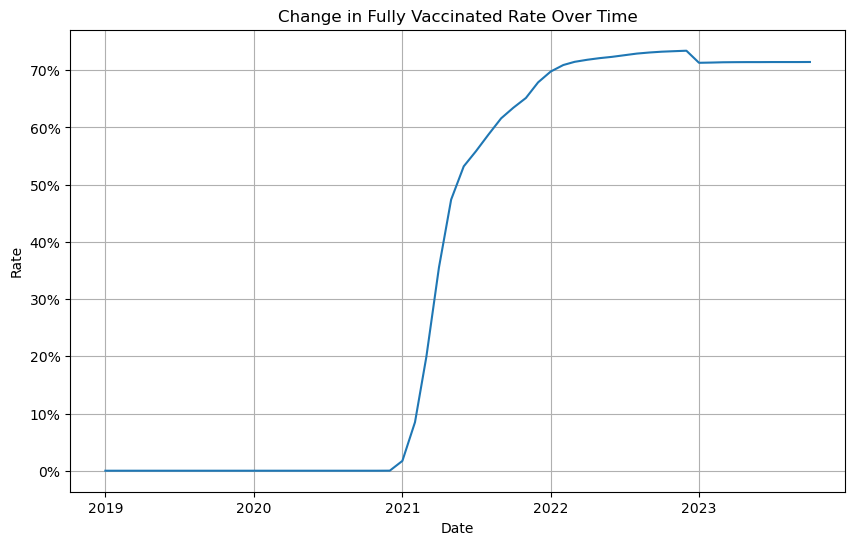

In [57]:
plt.figure(figsize=(10, 6))


ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))  # 1.0 means 100%

plt.plot(california_df['Fully Vaccinated Rate'])
plt.title('Change in Fully Vaccinated Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.grid(True)
plt.show()

In [60]:
video_df.columns

Index(['Channel Title', 'Published At', 'Video Title', 'Category Id',
       'Description', 'Tags', 'Definition', 'Caption', 'LicensedContent',
       'Projection', 'View Count', 'Like Count', 'Favorite Count',
       'Comment Count', 'Tag Count', 'Description Length (characters)',
       'Description Length (words)', 'Duration (seconds)', 'Publish Date',
       'Month', 'Year', 'Fully Vaccinated Rate', 'One Dose Rate',
       'Up To Date Rate'],
      dtype='object')

/var/folders/5m/31g0vz1s02x8sdpqgtmzpxh00000gn/T/ipykernel_9255/4077199924.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bootcamp_df['Date'] = pd.to_datetime(bootcamp_df[['Year', 'Month']].assign(day=1))


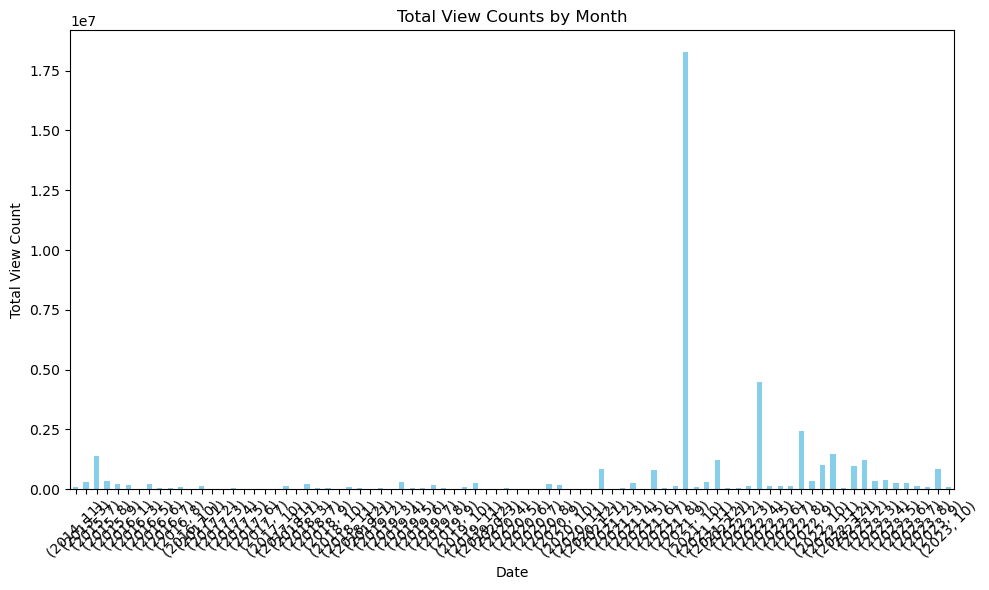

In [61]:
bootcamp_df['Date'] = pd.to_datetime(bootcamp_df[['Year', 'Month']].assign(day=1))
bootcamp_df.set_index('Date', inplace=True)

average_view_counts_by_month = bootcamp_df.groupby(['Year', 'Month'])['View Count'].sum()

average_view_counts_by_month.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Total View Counts by Month')
plt.xlabel('Date')
plt.ylabel('Total View Count')
plt.xticks(rotation=45)
plt.tight_layout()

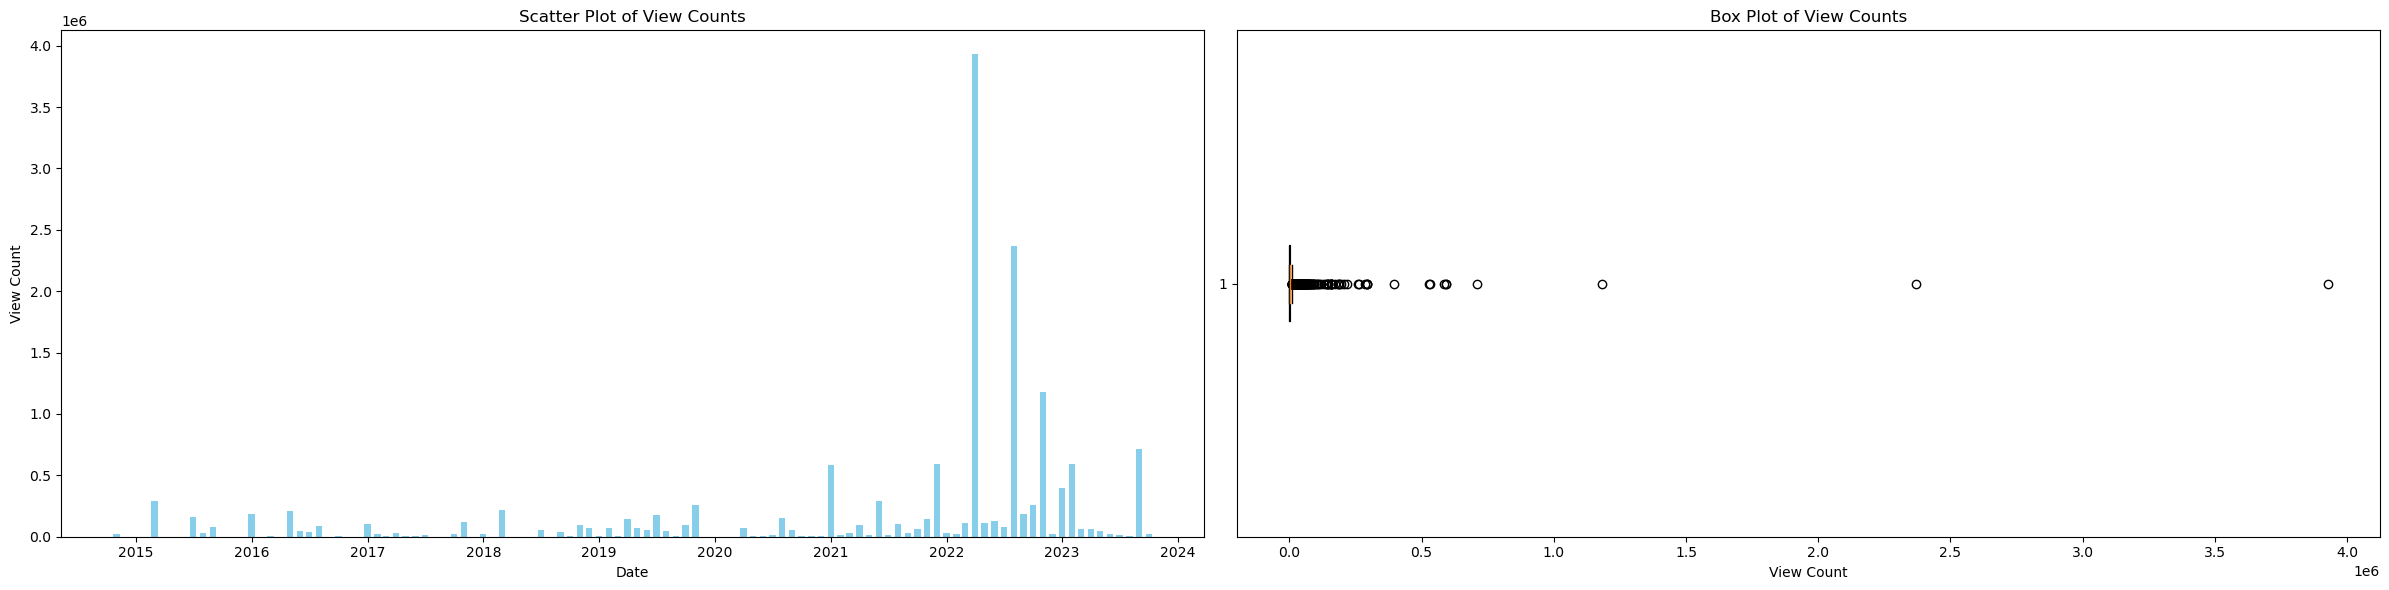

In [62]:
bootcamp_df = bootcamp_df[bootcamp_df["View Count"] < 18217638] # remove the viral video outlier in 9/2021
# Scatter plot
plt.figure(figsize=(24, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, plot in position 1
plt.bar(bootcamp_df.index, bootcamp_df['View Count'], color='skyblue', width=20)
plt.title('Scatter Plot of View Counts')
plt.xlabel('Date')
plt.ylabel('View Count')

# Box plot
plt.subplot(1, 2, 2)  # plot in position 2
plt.boxplot(bootcamp_df['View Count'], vert=False, notch=True, patch_artist=True)
plt.title('Box Plot of View Counts')
plt.xlabel('View Count')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()




In [63]:
outlier_df = bootcamp_df[(bootcamp_df["Year"] == 2022) & (bootcamp_df["Month"] == 4)]

In [64]:
outlier_df["View Count"].max()

3928143

In [65]:
outlier_removed = bootcamp_df[bootcamp_df["View Count"] != 18217638]

In [66]:
videos_by_year = bootcamp_df["Year"].value_counts()
videos_by_year

Year
2023    929
2022    283
2021    118
2020     67
2015     58
2019     37
2014     33
2017     20
2016     14
2018     10
Name: count, dtype: int64

In [67]:
videos_by_year2 = video_df["Year"].value_counts()
videos_by_year2

Year
2023    6480
2022    6138
2021    4080
2020    2493
2019    1552
2017    1484
2018    1469
2016     891
2014     528
2015     475
2010     403
2012     179
2013     171
2011     132
2009      33
2008       3
Name: count, dtype: int64

In [70]:
california_df
california_df['date_ordinal'] = california_df.index.to_series().apply(lambda x: x.toordinal())


In [188]:
channel_df = video_df[video_df["Channel Title"] == "A Life Engineered"]
channel_df['date_ordinal'] = pd.to_datetime(channel_df["Publish Date"]).apply(lambda date: date.toordinal())


/var/folders/5m/31g0vz1s02x8sdpqgtmzpxh00000gn/T/ipykernel_9255/1131927868.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  channel_df['date_ordinal'] = pd.to_datetime(channel_df["Publish Date"]).apply(lambda date: date.toordinal())


In [189]:
channel_df['date_ordinal'].min()

737834

/var/folders/5m/31g0vz1s02x8sdpqgtmzpxh00000gn/T/ipykernel_9255/2061618921.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(new_labels)


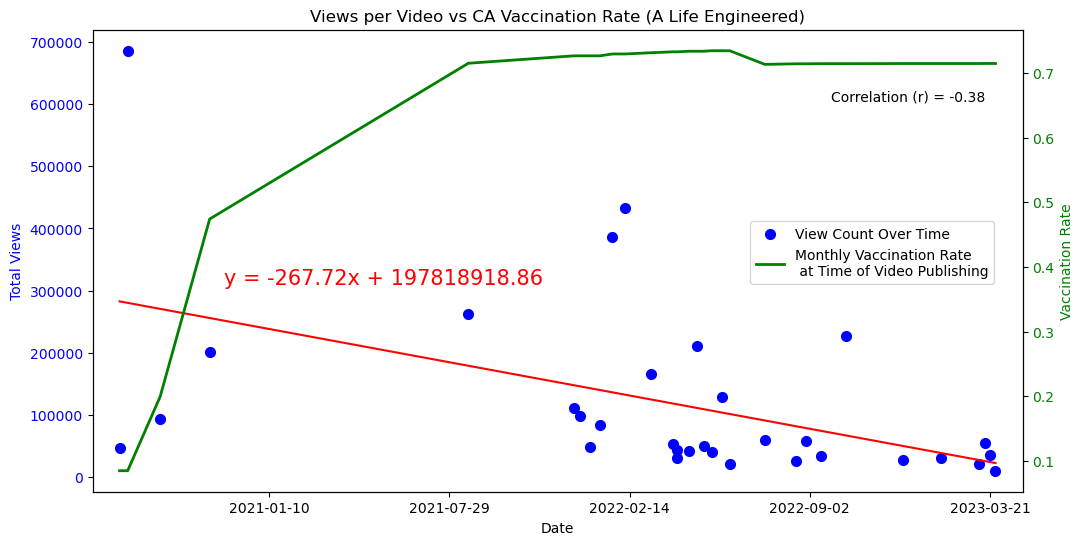

<Figure size 640x480 with 0 Axes>

In [204]:
# Create a figure and two subplots
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the first set of data (Bootcamp Videos) on the first axis
ax1.scatter(channel_df["date_ordinal"], channel_df["View Count"], marker='o', color='blue', linestyle='-', linewidth=2, label='View Count Over Time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Views', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Views per Video vs CA Vaccination Rate (A Life Engineered)')

# Create a second y-axis for the second dataset (Total Videos)
ax2 = ax1.twinx()
ax2.plot(channel_df["date_ordinal"], channel_df["Fully Vaccinated Rate"], color='green', linestyle='-', linewidth=2, label="Monthly Vaccination Rate \n at Time of Video Publishing")
ax2.set_ylabel('Vaccination Rate', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Calculate the correlation coefficient (r value)
correlation = np.corrcoef(channel_df["View Count"], channel_df["Fully Vaccinated Rate"])[0, 1]

# Add r value as text in the bottom right corner
ax1.text(.96, .87, f'Correlation (r) = {correlation:.2f}', transform=ax2.transAxes, fontsize=10,
        verticalalignment='top', horizontalalignment='right', color='black')

# https://stackoverflow.com/questions/29308729/how-to-plot-a-linear-regression-with-datetimes-on-the-x-axis
ax1.set_xlabel('Date')
new_labels = [date.fromordinal(int(item)) for item in ax1.get_xticks()]
new_labels_2 = [date.fromordinal(int(item)) for item in ax1.get_xticks()]
ax1.set_xticklabels(new_labels)

# Add the linear regression equation and line to plot
x_values = channel_df['date_ordinal']
y_values = channel_df['View Count']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plt.scatter(x_values,y_values)
ax1.plot(x_values,regress_values,"r-")
ax1.annotate(line_eq,(737950,310000),fontsize=15,color="red")
ax1.set_xlim(channel_df['date_ordinal'].min()-30, channel_df['date_ordinal'].max()+30)
ax2.set_xlim(channel_df['date_ordinal'].min()-30, channel_df['date_ordinal'].max()+30)

# Add legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, bbox_to_anchor=(0.7, 0.6))

# Show the plot
plt.show()
plt.savefig("lifeengineered.jpg")

/var/folders/5m/31g0vz1s02x8sdpqgtmzpxh00000gn/T/ipykernel_9255/2336377686.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  channel_df['date_ordinal'] = pd.to_datetime(channel_df["Publish Date"]).apply(lambda date: date.toordinal())
/var/folders/5m/31g0vz1s02x8sdpqgtmzpxh00000gn/T/ipykernel_9255/2336377686.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(new_labels)


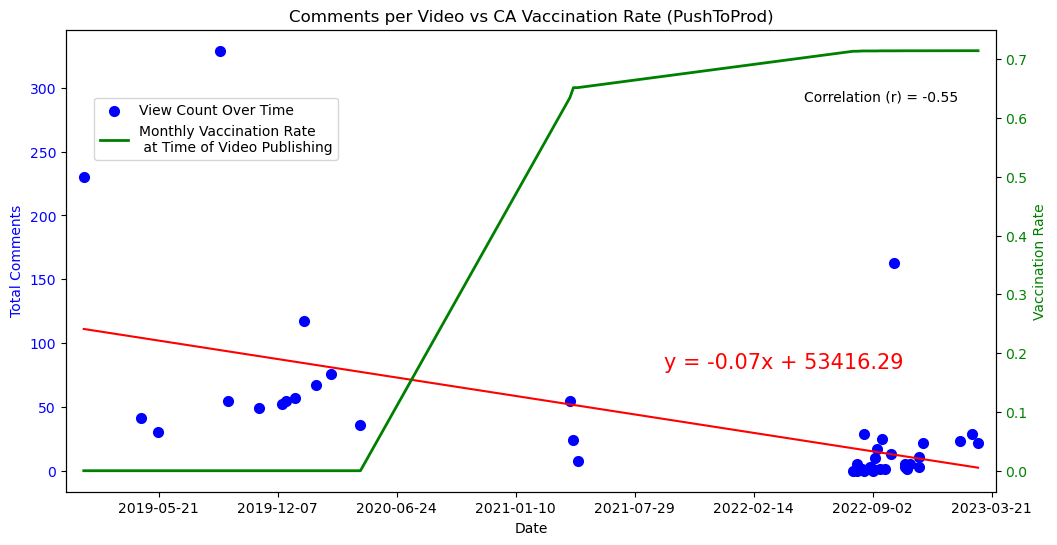

In [186]:
channel_df = video_df[video_df["Channel Title"] == "PushToProd"]
channel_df['date_ordinal'] = pd.to_datetime(channel_df["Publish Date"]).apply(lambda date: date.toordinal())


# Create a figure and two subplots
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the first set of data (Bootcamp Videos) on the first axis
ax1.scatter(channel_df["date_ordinal"], channel_df["Comment Count"], marker='o', color='blue', linestyle='-', linewidth=2, label='View Count Over Time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Comments', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Comments per Video vs CA Vaccination Rate (PushToProd)')

# Create a second y-axis for the second dataset (Total Videos)
ax2 = ax1.twinx()
ax2.plot(channel_df["date_ordinal"], channel_df["Fully Vaccinated Rate"], color='green', linestyle='-', linewidth=2, label="Monthly Vaccination Rate \n at Time of Video Publishing")
ax2.set_ylabel('Vaccination Rate', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Calculate the correlation coefficient (r value)
correlation = np.corrcoef(channel_df["Comment Count"], channel_df["Fully Vaccinated Rate"])[0, 1]

# Add r value as text in the bottom right corner
ax1.text(.96, .87, f'Correlation (r) = {correlation:.2f}', transform=ax2.transAxes, fontsize=10,
        verticalalignment='top', horizontalalignment='right', color='black')

# https://stackoverflow.com/questions/29308729/how-to-plot-a-linear-regression-with-datetimes-on-the-x-axis
ax1.set_xlabel('Date')
new_labels = [date.fromordinal(int(item)) for item in ax1.get_xticks()]
new_labels_2 = [date.fromordinal(int(item)) for item in ax1.get_xticks()]
ax1.set_xticklabels(new_labels)

# Add the linear regression equation and line to plot
x_values = channel_df['date_ordinal']
y_values = channel_df['Comment Count']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#ax1.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

# plt.scatter(x_values,y_values)
ax1.plot(x_values,regress_values,"r-")
ax1.annotate(line_eq,(738250,80),fontsize=15,color="red")
ax1.set_xlim(channel_df['date_ordinal'].min()-30, channel_df['date_ordinal'].max()+30)
ax2.set_xlim(channel_df['date_ordinal'].min()-30, channel_df['date_ordinal'].max()+30)

# Add legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, bbox_to_anchor=(0.3, 0.868))

# Show the plot
plt.show()


In [ ]:
# Channel View Count vs Fully Vaccinated Rate
correlations = {}
for channel in video_df["Channel Title"].unique():
    correlations[channel] = np.corrcoef(video_df[video_df["Channel Title"] == channel]["View Count"], video_df[video_df["Channel Title"] == channel]["Fully Vaccinated Rate"])[0, 1]

In [ ]:
#https://stackoverflow.com/questions/44664247/python-dictionary-how-to-get-all-keys-with-specific-values
strong_corr = [(k,v) for k,v in correlations.items() if (float(v) >= .5) or (float(v) <= -.5)]
medium_corr = [(k,v) for k,v in correlations.items() if (float(v) >= .3 and float(v) < .5) or (float(v) <= -.3 and float(v) >= -.5)]
weak_corr = [(k,v) for k,v in correlations.items() if (float(v) >= 0 and float(v) < .3) or (float(v) <= 0 and float(v) >= -.3)]

In [ ]:
strong_corr

In [ ]:
medium_corr

In [ ]:
# next steps, plot just the trend lines of the medium correlation vs covid vaccination rates (fully and partially)

In [ ]:
# Channel View Count vs One Dose Rate
correlations2 = {}
for channel in video_df["Channel Title"].unique():
    correlations2[channel] = np.corrcoef(video_df[video_df["Channel Title"] == channel]["View Count"], video_df[video_df["Channel Title"] == channel]["One Dose Rate"])[0, 1]

In [ ]:
strong_corr2 = [(k,v) for k,v in correlations2.items() if (float(v) >= .5) or (float(v) <= -.5)]
medium_corr2 = [(k,v) for k,v in correlations2.items() if (float(v) >= .3 and float(v) < .5) or (float(v) <= -.3 and float(v) >= -.5)]
weak_corr2 = [(k,v) for k,v in correlations2.items() if (float(v) >= 0 and float(v) < .3) or (float(v) <= 0 and float(v) >= -.3)]

In [ ]:
strong_corr2

In [ ]:
medium_corr2

In [ ]:
# Channel View Count vs Up To Date Rate
correlations3 = {}
for channel in video_df["Channel Title"].unique():
    correlations3[channel] = np.corrcoef(video_df[video_df["Channel Title"] == channel]["View Count"], video_df[video_df["Channel Title"] == channel]["Up To Date Rate"])[0, 1]

In [ ]:
strong_corr3 = [(k,v) for k,v in correlations3.items() if (float(v) >= .5) or (float(v) <= -.5)]
medium_corr3 = [(k,v) for k,v in correlations3.items() if (float(v) >= .3 and float(v) < .5) or (float(v) <= -.3 and float(v) >= -.5)]
weak_corr3 = [(k,v) for k,v in correlations3.items() if (float(v) >= 0 and float(v) < .3) or (float(v) <= 0 and float(v) >= -.3)]

In [ ]:
strong_corr3

In [ ]:
medium_corr3

In [ ]:
correlations_likes = {}
for channel in video_df["Channel Title"].unique():
    correlations_likes[channel] = np.corrcoef(video_df[video_df["Channel Title"] == channel]["Like Count"], video_df[video_df["Channel Title"] == channel]["Fully Vaccinated Rate"])[0, 1]

In [ ]:
correlations_likes

In [ ]:
strong_corr_likes = [(k,v) for k,v in correlations_likes.items() if (float(v) >= .5) or (float(v) <= -.5)]
medium_corr_likes = [(k,v) for k,v in correlations_likes.items() if (float(v) >= .3 and float(v) < .5) or (float(v) <= -.3 and float(v) >= -.5)]
weak_corr_likes = [(k,v) for k,v in correlations_likes.items() if (float(v) >= 0 and float(v) < .3) or (float(v) <= 0 and float(v) >= -.3)]

In [ ]:
medium_corr_likes

In [ ]:
correlations_likes_2 = {}
for channel in video_df["Channel Title"].unique():
    correlations_likes_2[channel] = np.corrcoef(video_df[video_df["Channel Title"] == channel]["Like Count"], video_df[video_df["Channel Title"] == channel]["One Dose Rate"])[0, 1]

In [ ]:
comptia = video_df[video_df["Channel Title"] == "CompTIA"]
comptia

In [ ]:
#comptia = video_df[video_df["Channel Title"] == "CompTIA"]
for index, row in comptia.iterrows():
    if row["Fully Vaccinated Rate"] == -np.inf:
        print("found")
comptia = comptia.replace([np.inf, -np.inf], np.nan).fillna("")


In [ ]:
comptia

In [ ]:
correlations_likes_2

In [ ]:
video_df.columns

In [164]:
correlations_comments = {}
for channel in video_df["Channel Title"].unique():
    correlations_comments[channel] = np.corrcoef(video_df[video_df["Channel Title"] == channel]["Comment Count"], video_df[video_df["Channel Title"] == channel]["Fully Vaccinated Rate"])[0, 1]

In [165]:
strong_corr_comments = [(k,v) for k,v in correlations_comments.items() if (float(v) >= .5) or (float(v) <= -.5)]
medium_corr_comment = [(k,v) for k,v in correlations_comments.items() if (float(v) >= .3 and float(v) < .5) or (float(v) <= -.3 and float(v) >= -.5)]
weak_corr_comments = [(k,v) for k,v in correlations_comments.items() if (float(v) >= 0 and float(v) < .3) or (float(v) <= 0 and float(v) >= -.3)]

In [166]:
strong_corr_comments

[('PushToProd', -0.5516787396011719)]

In [167]:
medium_corr_comment

[('Thu Vu data analytics', 0.329295592230249),
 ('A Life Engineered', -0.32427262787613986)]

In [ ]:
correlations_tags = {}
for channel in video_df["Channel Title"].unique():
    correlations_fav[channel] = np.corrcoef(video_df[video_df["Channel Title"] == channel]["View Count"], video_df[video_df["Channel Title"] == channel]["Tag Count"])[0, 1]
correlations_fav